Geometric meaning:
The SVM tries to find the maximum margin hyperplane that separates the two classes $(y_i = 1 or -1)$.
The hyperplane is $w^T x + b = 0$. 
We want to maximize the margin (distance between hyperplane and closest points).
The $\xi_i$ are slack variables that allow some points to be within the margin or misclassified. The $f(\xi_i)$ penalizes this.


Dual problem:
Lagrangian: 
$L(w,b,\xi,\alpha,\mu) = 1/2|w|^2 + C\sum_i f(\xi_i) - \sum_i \alpha_i [ y_i(w^T x_i + b) - 1 + \xi_i] - \sum_i \mu_i \xi_i$

Take derivatives wrt primal variables w,b,\xi and set to 0: 

$w = \sum_i \alpha_i y_i x_i $

$\sum_i \alpha_i y_i = 0 $

$Cf'(\xi_i) - \alpha_i - \mu_i = 0$

Substitute back into Lagrangian: 

$L(\alpha) = -\frac{1}{2}\sum_{i,j} \alpha_i \alpha_j y_i y_j (x_i^T x_j) + \sum_i \alpha_i$
s.t. $\alpha_i >= 0$ and $\sum_i \alpha_i y_i = 0$

So the dual problem is: 

$max_\alpha -\frac{1}{2}\sum_{i,j} \alpha_i \alpha_j y_i y_j (x_i^T x_j) + \sum_i \alpha_i s.t. \alpha_i >= 0, \sum_i \alpha_i y_i = 0$

dict_keys(['reward_list', 'action_list', 'obs_list'])
[array([0., 0.], dtype=float32), array([0.       , 0.0005596], dtype=float32), array([5.5959839e-07, 1.1173447e-03], dtype=float32), array([1.6769432e-06, 1.6732467e-03], dtype=float32), array([3.3501899e-06, 2.2273099e-03], dtype=float32), array([5.5774999e-06, 2.7795383e-03], dtype=float32), array([8.3570385e-06, 3.3299357e-03], dtype=float32), array([1.1686974e-05, 3.8785096e-03], dtype=float32), array([1.5565483e-05, 4.4252640e-03], dtype=float32), array([1.9990748e-05, 4.9702064e-03], dtype=float32), array([2.4960953e-05, 5.5133421e-03], dtype=float32), array([3.0474295e-05, 6.0546780e-03], dtype=float32), array([3.6528974e-05, 6.5942165e-03], dtype=float32), array([4.3123189e-05, 7.1319644e-03], dtype=float32), array([5.0255156e-05, 7.6679271e-03], dtype=float32), array([5.792308e-05, 8.202108e-03], dtype=float32), array([6.612519e-05, 8.734515e-03], dtype=float32), array([7.485970e-05, 9.265153e-03], dtype=float32), array([8.

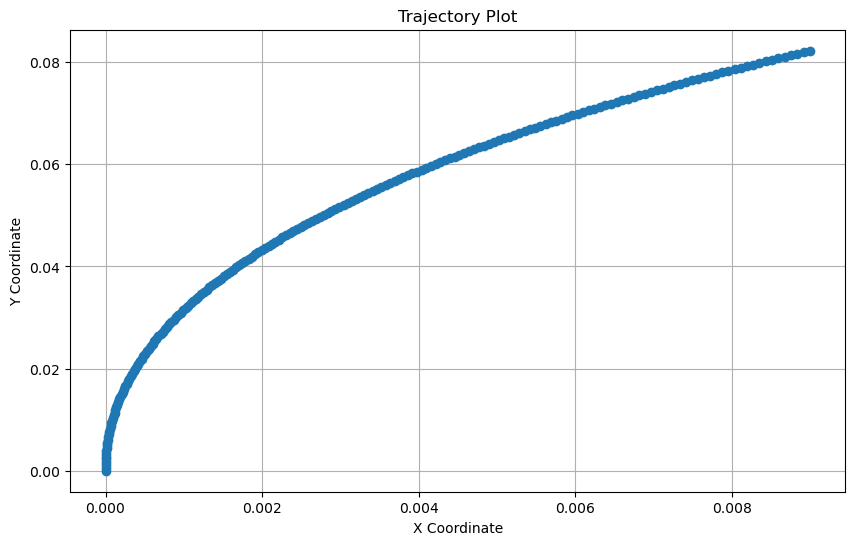

In [24]:
import numpy as np
file_path = '/home/qinshentao/code/gops/results/quadrotor_1dof_tracking_stablization/SAC_231204-165502/evaluator/iter3600_ep9.npy'
data_raw = np.load(file_path,allow_pickle=True)
data = data_raw.item()['obs_list']
print(data_raw.item().keys())
print(data_raw.item()['obs_list'])

import matplotlib.pyplot as plt
import numpy as np


# Extracting x and y coordinates
x = [point[0] for point in data]
y = [point[1] for point in data]

# Plotting the trajectory
plt.figure(figsize=(10, 6))
plt.plot(x, y, marker='o')
plt.title('Trajectory Plot')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.grid(True)
plt.show()


In [11]:
import torch
import numpy as np

# Assuming the provided data array is assigned to variable 'data'
data = torch.tensor([
    [-2.5611e-03, -1.9360e-01],
    [-4.1735e-02, -7.4207e-01],
    [-1.0400e-02, -4.0232e-01],
    # ... (other data points omitted for brevity) ...
    [-3.9596e-02, -7.1410e-01],
    [-1.1771e-03, -1.2551e-01],
    [-1.8008e-05, -2.3149e-02],
    [-9.2750e-04, -1.1584e-01],
    [-4.0557e-02, -7.2996e-01]
])

# Calculate the infinite norm (max norm) for each row in the data
# and then take the maximum value among them
norms_inf = max(torch.norm(data[i]) for i in range(len(data)))
# max_norm_inf = torch.max(norms_inf)

# max_norm_inf
norms_inf


tensor(0.7432)

In [9]:
torch.norm(torch.tensor([-4.1735e-02, -7.4207e-01]))

tensor(0.7432)

In [17]:
# 给定的数据
data = torch.tensor([
    [-2.5611e-03, -1.9360e-01],
    [-4.1735e-02, -7.4207e-01],
    [-1.0400e-02, -4.0232e-01],
    [-3.9596e-02, -7.1410e-01],
    [-1.1771e-03, -1.2551e-01],
    [-1.8008e-05, -2.3149e-02],
    [-9.2750e-04, -1.1584e-01],
    [-4.0557e-02, -7.2996e-01]
])

# 给定的常数，例如 0.5
const = 0.5
# 计算每一项的无穷范数
norms_inf = (torch.norm(data, dim=1)<const)




less_than_const  # 返回一个布尔张量，表示每一项的范数是否小于常数


tensor([ True, False,  True, False,  True,  True,  True, False])

In [19]:
# 给定的数据
data = torch.tensor([
    [3, 4],
    [-3.0051e-02, -7.0834e-01],
    [-1.1166e-02, -4.4919e-01]
])

# 计算每一行的平方和
squared_sums = torch.sum(data ** 2, dim=1)

squared_sums  # 返回每一行的平方和


tensor([25.0000,  0.5026,  0.2019])